In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

Using TensorFlow backend.
C:\Users\AVANISH SINGHAL\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AVANISH SINGHAL\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AVANISH SINGHAL\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [3]:
img_width, img_height = 50, 50

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = './breast-histopathology-images/8867/'
validation_data_dir = './breast-histopathology-images/8914/',
nb_train_samples = 1422
nb_validation_samples = 800
epochs = 10
batch_size = 16

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
    './breast-histopathology-images/8867/',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_train = model.predict_generator(
    generator, nb_train_samples / batch_size)
np.save(open('bottleneck_features_trains.npy', 'wb'),
        bottleneck_features_train)

generator = datagen.flow_from_directory(
    './breast-histopathology-images/8914/',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_validation = model.predict_generator(
    generator, nb_validation_samples / batch_size)
np.save(open('bottleneck_features_validations.npy', 'wb'),
        bottleneck_features_validation)




Found 1422 images belonging to 2 classes.

Found 800 images belonging to 2 classes.


In [5]:
train_data = np.load(open('bottleneck_features_trains.npy','rb'))
train_labels = np.array(
    [0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

validation_data = np.load(open('bottleneck_features_validations.npy','rb'))
validation_labels = np.array(
    [0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(train_data, train_labels,
          epochs=10,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))
# model.save_weights(top_model_weights_path)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1422 samples, validate on 800 samples
Epoch 1/10
1422/1422 [==============================] - 3s 2ms/step - loss: 0.6099 - accuracy: 0.6920 - val_loss: 0.6081 - val_accuracy: 0.6725
Epoch 2/10
1422/1422 [==============================] - 1s 614us/step - loss: 0.5004 - accuracy: 0.7496 - val_loss: 0.5865 - val_accuracy: 0.6800
Epoch 3/10
1422/1422 [==============================] - 1s 612us/step - loss: 0.4766 - accuracy: 0.7623 - val_loss: 0.6493 - val_accuracy: 0.6862
Epoch 4/10
1422/1422 [==============================] - 1s 599us/step - loss: 0.4724 - accuracy: 0.7623 - val_loss: 0.6126 - val_accuracy: 0.6938
Epoch 5/10
1422/1422 [==============================] - 1s 629us/step - loss: 0.4427 - accuracy: 0.7862 - val_loss: 0.6868 - val_accuracy: 0.6712
Epoch 6/10
1422/1422 [==============================] - 1s 598us/step - loss: 0.4541 - accuracy: 0.7876 - val_loss: 0.6424 - val_ac

In [7]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

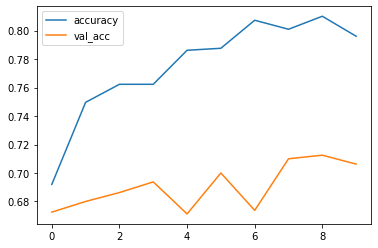

In [8]:
plt.plot(acc,label='accuracy')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

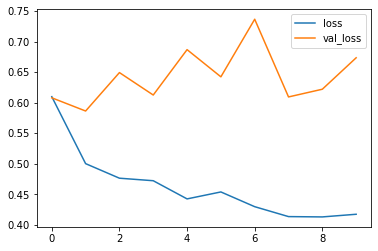

In [9]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label= 'val_loss')
plt.legend()
plt.show()

In [14]:
preds = np.round(model.predict(validation_data),0)
print(preds)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

status = ["cancer","noncancer"]
class_metrics = metrics.classification_report(validation_labels,preds,target_names = status)
print(class_metrics)

              precision    recall  f1-score   support

      cancer       0.65      0.89      0.75       400
   noncancer       0.83      0.52      0.64       400

   micro avg       0.71      0.71      0.71       800
   macro avg       0.74      0.71      0.70       800
weighted avg       0.74      0.71      0.70       800



In [16]:
model.evaluate(validation_data,validation_labels)

800/800 [==============================] - 0s 43us/step


[0.6735305505990982, 0.706250011920929]